In [1]:
#εισαγωγή βιβλιοθηκών - πακέτων
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#εισαγωγή του συνόλου δεδομένων
dataset=pd.read_csv("https://media.githubusercontent.com/media/kdemertzis/EKPA/main/Data/Ransomware.csv",sep='|')

In [3]:
#eξερεύνηση συνόλου δεδομένων
dataset

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [4]:
#περιγραφικά στατιστικά συνόλου δεδομένων
dataset.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [5]:
# ανακάτεμα δεδομένων
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,System.dll,fe59d0c5852b72bd304655be30e76d13,332,224,8462,8,0,2826240,348160,0,...,40,3.195009,2.370859,4.990543,8471.400000,34,316544,0,17,1
1,VirusShare_228bde3352592db7a32ea97203cfc574,228bde3352592db7a32ea97203cfc574,332,224,258,10,0,120320,385024,0,...,6,3.729824,2.458492,5.317552,2739.500000,48,9640,72,15,0
2,VirusShare_b65d081cef7a73ac8c84a323f8ed9a56,b65d081cef7a73ac8c84a323f8ed9a56,332,224,258,10,0,119296,383488,0,...,14,6.152986,2.458492,7.993528,23789.071429,48,40724,72,14,0
3,VirusShare_8b5d05337aee4c70277d2253e2a9de88,8b5d05337aee4c70277d2253e2a9de88,332,224,258,10,0,120320,385024,0,...,6,3.729824,2.458492,5.317552,2739.500000,48,9640,72,15,0
4,VirusShare_4eb76cd06c11b052c81d7bd975032196,4eb76cd06c11b052c81d7bd975032196,332,224,33167,2,25,65024,19456,0,...,16,3.606643,2.430164,5.179059,654.875000,16,2216,0,15,0


In [6]:
#tαξινόμηση δεδομένων με βάση το εάν είναι νόμιμο ή κακόβουλο λογισμικό
#0 legit, 1 ransomware
dataset.groupby(dataset['legitimate']).size()

,0
legitimate,
0,96724
1,41323


([<matplotlib.patches.Wedge at 0x7f668b268920>,
 [Text(0.6484073680146373, 0.888576324861478, 'Malware'),
  Text(-0.6484076610757229, -0.8885761110103684, 'Legitimate')],
 [Text(0.3536767461898021, 0.4846779953789879, '30%'),
  Text(-0.35367690604130336, -0.48467787873292817, '70%')])

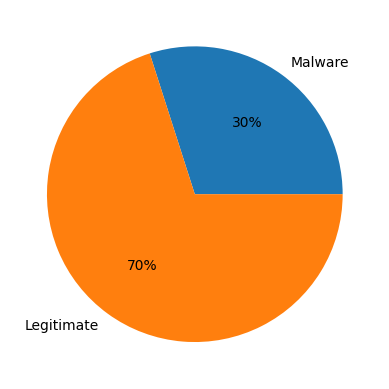

In [7]:
#γραφική απεικόνιση δεδομένων με βάση το εάν είναι νόμιμο ή κακόβουλο λογισμικό#
#0 legit, 1 ransomware
type_classify=['Malware', 'Legitimate']
count_classify=[41323,96724]
plt.pie(count_classify, labels=type_classify, autopct='%0.f%%')

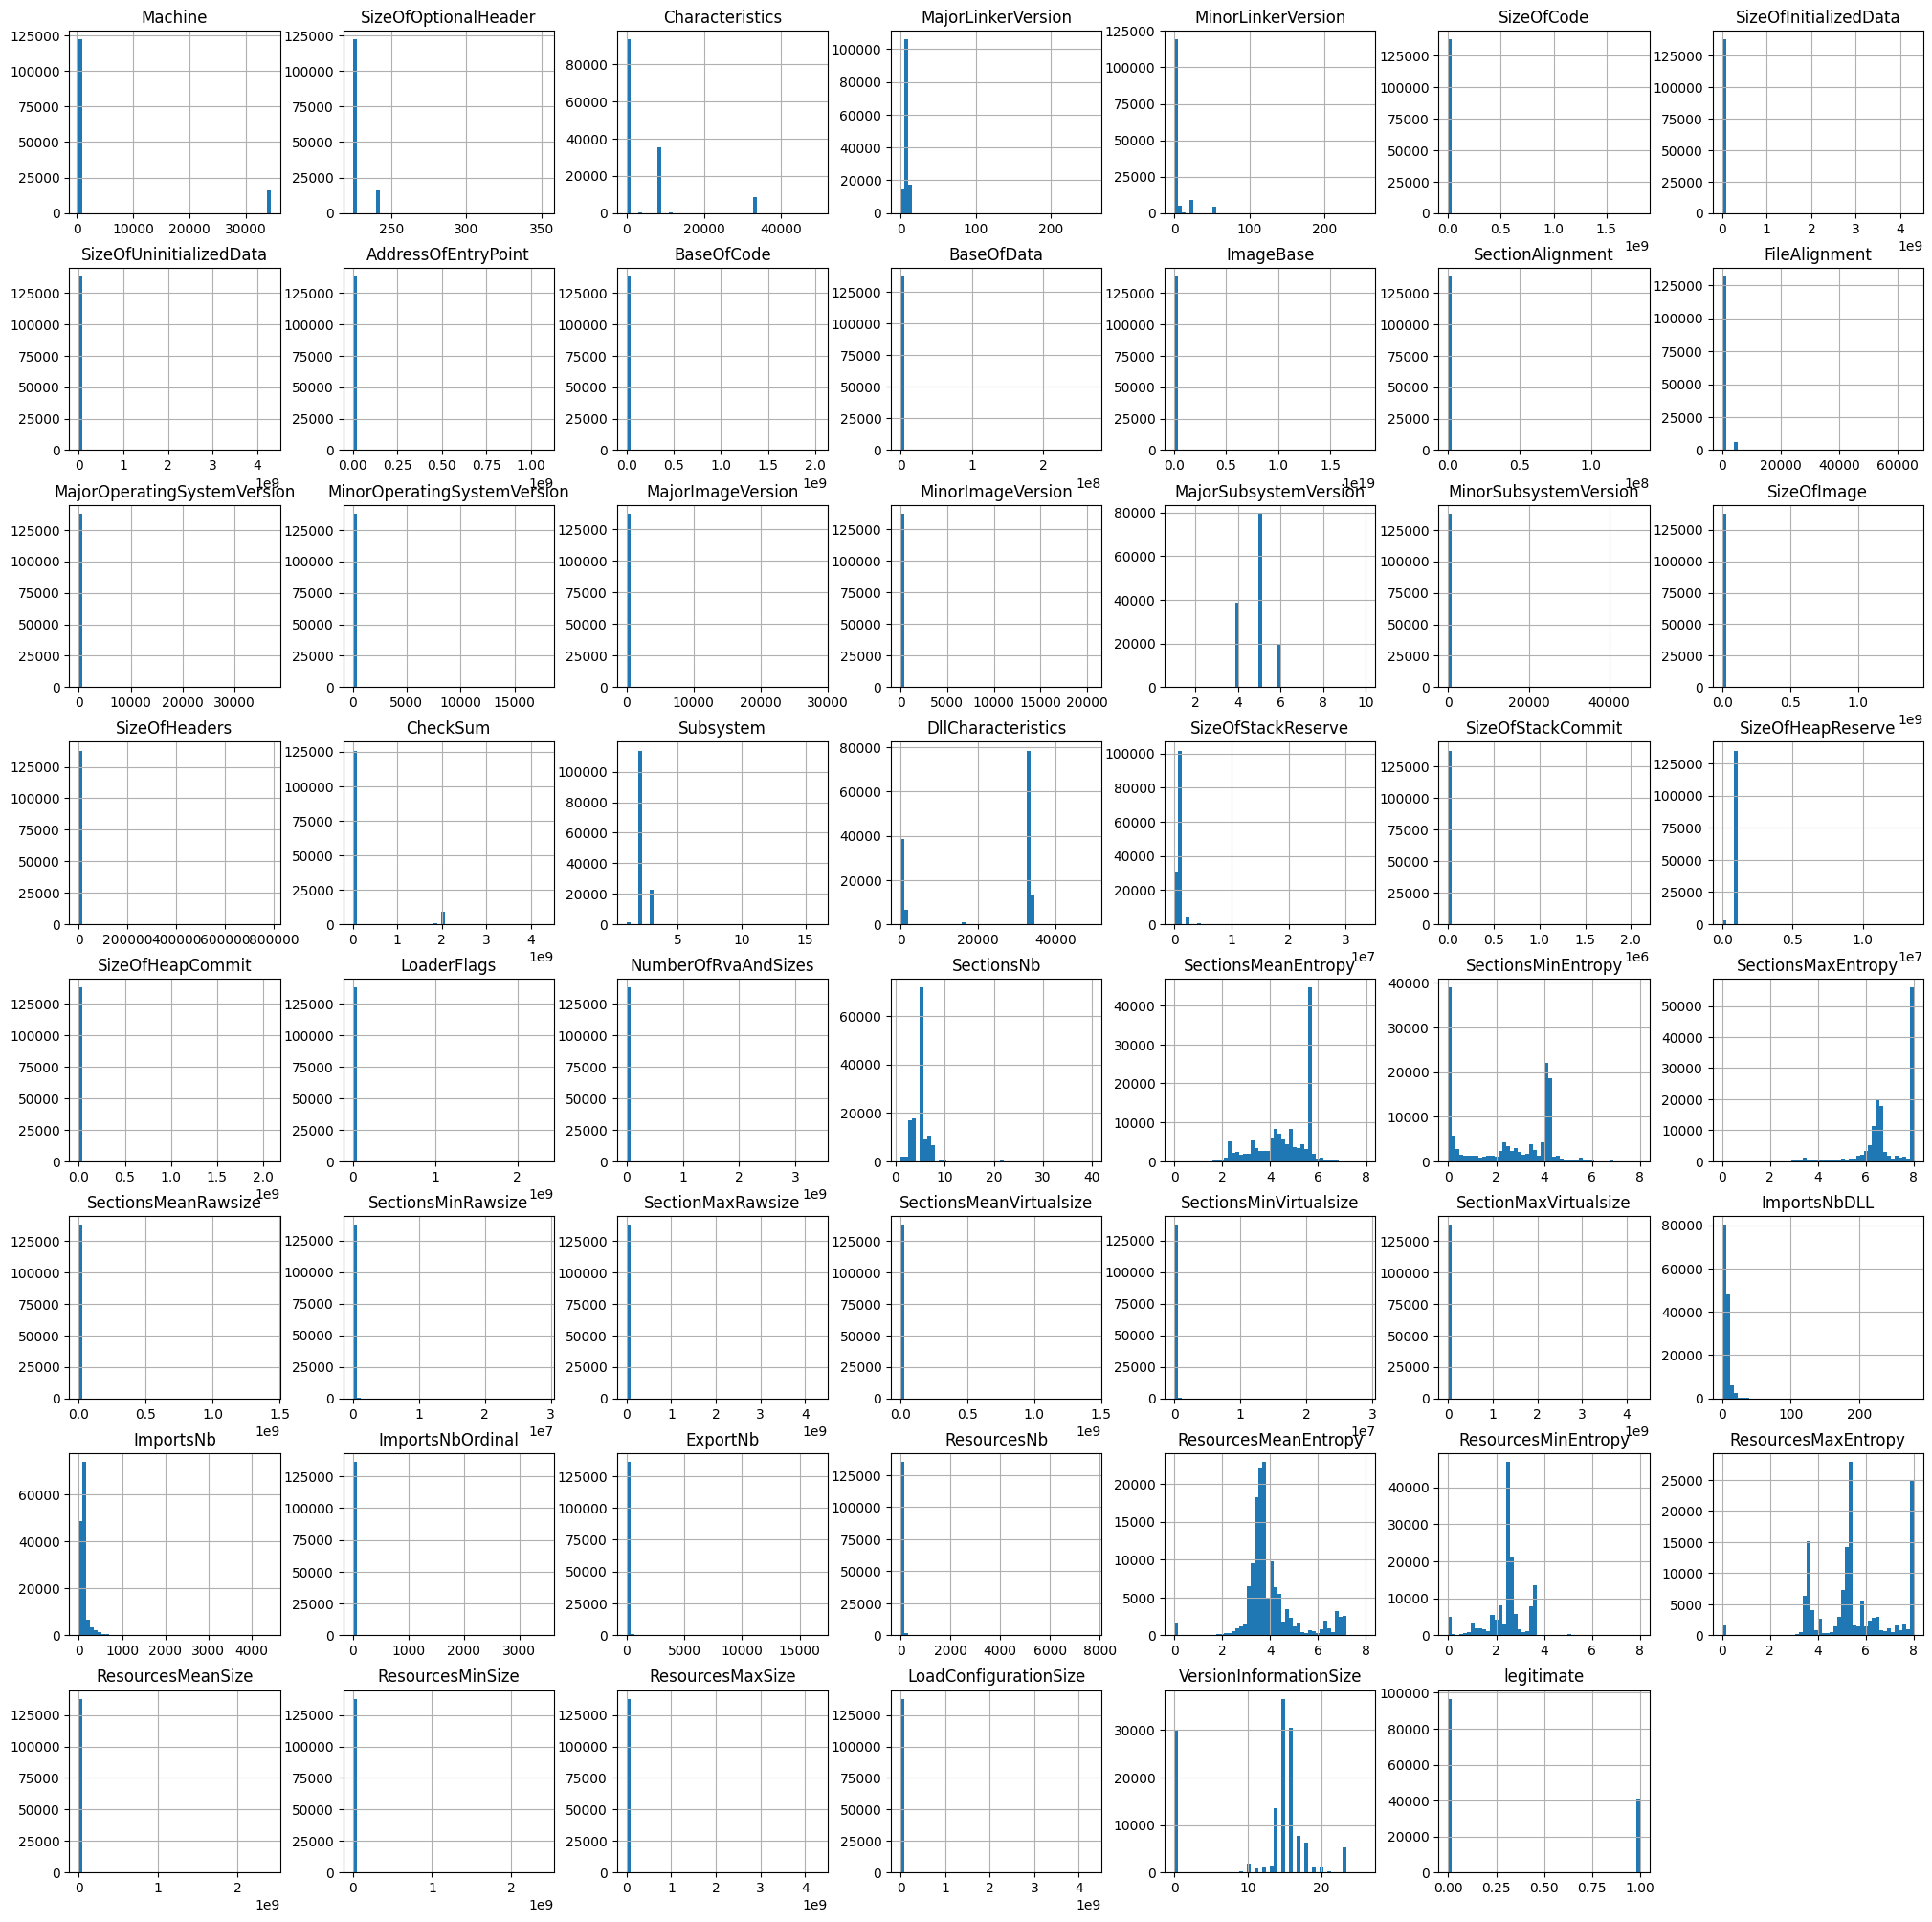

In [8]:
#οπτικοποίηση της κατανομής των δεδομένων
dataset.hist(bins = 50,figsize = (25,25))
plt.show()

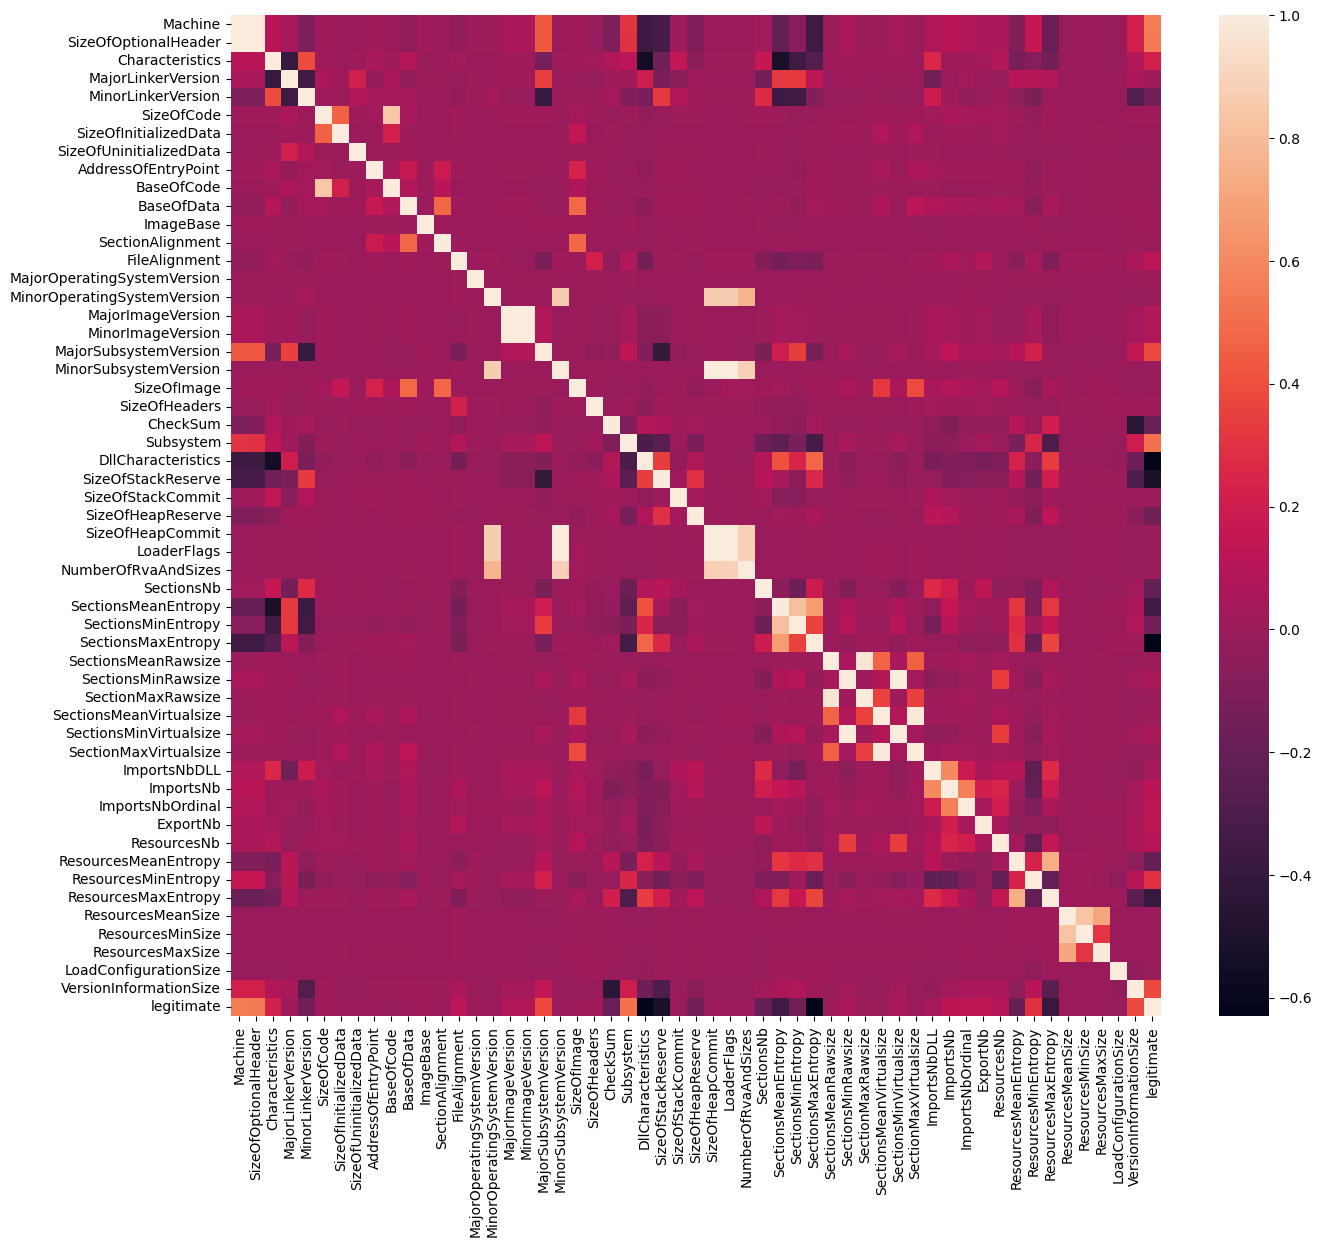

In [9]:
#πίνακας συσχέτισης χαρακτηριστικών του συνόλου δεδομένων
plt.figure(figsize=(15,13))

#αριθμητικές στήλες
sns.heatmap(dataset.select_dtypes(include=['int64', 'float64']).corr())

plt.show()

In [10]:
#έλεγχος κενών τιμών στα δεδομένα
dataset.isnull().sum()

,0
Name,0
md5,0
Machine,0
SizeOfOptionalHeader,0
Characteristics,0
MajorLinkerVersion,0
MinorLinkerVersion,0
SizeOfCode,0
SizeOfInitializedData,0
SizeOfUninitializedData,0


In [11]:
# Ορισμός X και y
X = dataset.drop('legitimate', axis=1)
y = dataset['legitimate']

In [12]:
# Χειρισμός τιμών που λείπουν με στρατηγική "συμπλήρωση με σταθερή τιμή"
imputer = SimpleImputer(strategy='constant', fill_value='unknown')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X_imputed

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
0,System.dll,fe59d0c5852b72bd304655be30e76d13,332,224,8462,8,0,2826240,348160,0,...,0,40,3.195009,2.370859,4.990543,8471.4,34,316544,0,17
1,VirusShare_228bde3352592db7a32ea97203cfc574,228bde3352592db7a32ea97203cfc574,332,224,258,10,0,120320,385024,0,...,0,6,3.729824,2.458492,5.317552,2739.5,48,9640,72,15
2,VirusShare_b65d081cef7a73ac8c84a323f8ed9a56,b65d081cef7a73ac8c84a323f8ed9a56,332,224,258,10,0,119296,383488,0,...,0,14,6.152986,2.458492,7.993528,23789.071429,48,40724,72,14
3,VirusShare_8b5d05337aee4c70277d2253e2a9de88,8b5d05337aee4c70277d2253e2a9de88,332,224,258,10,0,120320,385024,0,...,0,6,3.729824,2.458492,5.317552,2739.5,48,9640,72,15
4,VirusShare_4eb76cd06c11b052c81d7bd975032196,4eb76cd06c11b052c81d7bd975032196,332,224,33167,2,25,65024,19456,0,...,0,16,3.606643,2.430164,5.179059,654.875,16,2216,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,DU.dll,8a25ae26797e619d600938542dd7d5be,332,224,8450,9,0,69120,9216,0,...,220,1,3.536006,3.536006,3.536006,884.0,884,884,72,16
138043,atl.dll,d16903b9431f799877ad6df13d16bda0,332,224,8462,6,0,34304,24064,0,...,52,5,3.233791,0.695987,5.153141,1702.6,38,7220,0,17
138044,VirusShare_46f004fb9cdd93167dc0ac339d436286,46f004fb9cdd93167dc0ac339d436286,332,224,290,10,0,130048,65024,0,...,0,4,2.96039,1.021167,4.925236,299.0,146,472,0,12
138045,VirusShare_77e4e8fdaa90cabc01e63a9ff51328d8,77e4e8fdaa90cabc01e63a9ff51328d8,332,224,33167,2,25,528384,28672,892928,...,0,261,4.758917,0.0,7.918944,2375.858238,16,207260,0,18


In [13]:
# Ορίζουμε ένα LabelEncoder για κάθε στήλη με συμβολοσειρές
label_encoders = {}
for column in X_imputed.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    X_imputed[column] = label_encoders[column].fit_transform(X_imputed[column])

In [14]:
# Δημιουργία του OneClassSVM με προεπιλεγμένες ρυθμίσεις για τον εντοπισμό ακραίων τιμών
outlier_detector = OneClassSVM(nu=0.05)
outliers = outlier_detector.fit_predict(X_imputed)

In [15]:
# Επαναφορά των αρχικών τιμών συμβολοσειρών αν χρειαστεί
for column in X_imputed.select_dtypes(include='object').columns:
    X_imputed[column] = label_encoders[column].inverse_transform(X_imputed[column])

In [16]:
# Εκτύπωση των ακραίων τιμών
print("Ακραίες Τιμές:\n", outliers)

Ακραίες Τιμές:
 [-1  1  1 ...  1  1  1]


In [17]:
# Δημιουργία νέου συνόλου δεδομένων μετά την αφαίρεση των ακραίων τιμών
clean_data = pd.DataFrame(X_imputed[outliers != -1])
clean_data['legitimate'] = y[outliers != -1]

In [18]:
# Αναφορά του νέου συνόλου ανά κλάση
remaining_instances_report = clean_data['legitimate'].value_counts()
print("Αναφορά υπολοίπων περιπτώσεων ανά κατηγορία:\n", remaining_instances_report)

Αναφορά υπολοίπων περιπτώσεων ανά κατηγορία:
 legitimate
0    94378
1    36766
Name: count, dtype: int64


In [19]:
# Εκτύπωση καθαρού συνόλου
clean_data

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
1,13166,13995,0,0,11,10,0,309,819,0,...,6,25655,2649,16569,9163,44,2027,1,9,0
2,65163,89950,0,0,11,10,0,307,816,0,...,14,42061,2649,22313,14300,44,3334,1,8,0
3,43373,61285,0,0,11,10,0,309,819,0,...,6,25655,2649,16569,9163,44,2027,1,9,0
4,23560,31609,0,0,94,2,24,190,71,0,...,16,23646,2606,16033,2672,16,899,0,9,0
6,17506,21497,0,0,11,10,0,308,819,0,...,6,26200,2649,16569,9161,44,2027,1,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,957,60552,0,0,70,9,0,199,46,0,...,1,18946,12267,6114,4026,648,266,1,10,1
138043,102074,110265,0,0,73,6,0,123,81,0,...,5,7983,186,15947,7182,36,1811,0,11,1
138044,21694,28495,0,0,21,10,0,329,173,0,...,4,3410,383,14717,362,118,97,0,6,0
138045,34707,49381,0,0,94,2,24,1109,91,269,...,239,39042,0,21099,8654,16,4846,0,12,0


In [20]:
#τμηματοποίηση συνόλου σε δεδομένα εκπαίδευσης και δοκιμών
X_train, X_test, y_train, y_test = train_test_split(clean_data.drop('legitimate', axis=1), clean_data['legitimate'], test_size=0.2, random_state=42)

In [21]:
#κλιμάκωση δεδομένων
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 1.290785  ,  1.51631505, -0.34956628, ...,  1.08608657,
         0.48353952,  0.74620304],
       [-0.3027765 , -0.04492696, -0.34956628, ..., -0.05886755,
         0.48353952,  0.30035572],
       [-1.65479624,  1.18483063, -0.34956628, ..., -1.16808321,
         0.48353952,  0.52327938],
       ...,
       [ 1.3806524 ,  1.35323725,  2.86089863, ...,  1.13241419,
         5.53097867,  0.52327938],
       [-1.59992624, -0.60777132, -0.34956628, ..., -1.1475667 ,
        -0.77832026,  0.9691267 ],
       [-1.17566451, -1.2551194 , -0.34956628, ..., -0.80540411,
        -0.77832026, -1.70595723]])

In [22]:
#σύγκριση αλγορίθμων: RandomForest, GradientBoosting, AdaBoost
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

ranking_table_comparison = pd.DataFrame(columns=['Accuracy', 'Recall', 'Precision', 'F1 Score'])

In [23]:
#αξιολόγηση μοντέλων
for model_name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)

    #αξιολόγηση στο σύνολο δοκιμών
    y_pred = pipeline.fit(X_train_scaled, y_train).predict(X_test_scaled)

    #υπολογισμών μετρικών αξιολόγησης
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    #κατάταξη αποτελεσμάτων αξιολόγησης
    ranking_table_comparison.loc[model_name] = [accuracy, recall, precision, f1]

    #αποτελέσματα αξιολόγησης
    print(f"{model_name} - Αποτελέσματα Κατηγοριοποίησης:\n", classification_report(y_test, y_pred))
    print(f"{model_name} - Πίνακας Συγχυσης:\n", confusion_matrix(y_test, y_pred))
    print()

RandomForest - Αποτελέσματα Κατηγοριοποίησης:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18809
           1       1.00      1.00      1.00      7420

    accuracy                           1.00     26229
   macro avg       1.00      1.00      1.00     26229
weighted avg       1.00      1.00      1.00     26229

RandomForest - Πίνακας Συγχυσης:
 [[18798    11]
 [    1  7419]]

GradientBoosting - Αποτελέσματα Κατηγοριοποίησης:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18809
           1       1.00      1.00      1.00      7420

    accuracy                           1.00     26229
   macro avg       1.00      1.00      1.00     26229
weighted avg       1.00      1.00      1.00     26229

GradientBoosting - Πίνακας Συγχυσης:
 [[18808     1]
 [    0  7420]]

AdaBoost - Αποτελέσματα Κατηγοριοποίησης:
               precision    recall  f1-score   support

           0  

In [24]:
#αποτύπωση αποτελεσμάτων αξιολόγησης
print("Κατάταξη Αποτελεσμάτων:")
print(ranking_table_comparison)

Κατάταξη Αποτελεσμάτων:
                  Accuracy    Recall  Precision  F1 Score
RandomForest      0.999542  0.999865   0.998520  0.999192
GradientBoosting  0.999962  1.000000   0.999865  0.999933
AdaBoost          1.000000  1.000000   1.000000  1.000000


In [25]:
# ελεγχος αν ειναι ηδη εγκατεστημενο το ppscore
!pip show ppscore

In [26]:
# εγκατασταση του ppscore
!pip install git+https://github.com/8080labs/ppscore.git

  Cloning https://github.com/8080labs/ppscore.git to /tmp/pip-req-build-to7gft8z
  Running command git clone --filter=blob:none --quiet https://github.com/8080labs/ppscore.git /tmp/pip-req-build-to7gft8z
  Resolved https://github.com/8080labs/ppscore.git to commit 756dc2619ae4ac4d2e66635a730eff14a8101eb1
  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13188 sha256=9c3ce54a1e48accad492908c9c67d5df6f57345534663bc803fac7e2b3d7ffd3
  Stored in directory: /tmp/pip-ephem-wheel-cache-bjcjrtqv/wheels/d9/52/0a/452c019aee4d85825ed2e9373e23c808e18dbeb0d13b66eeca
Successfully built ppscore


In [29]:
import ppscore as pps

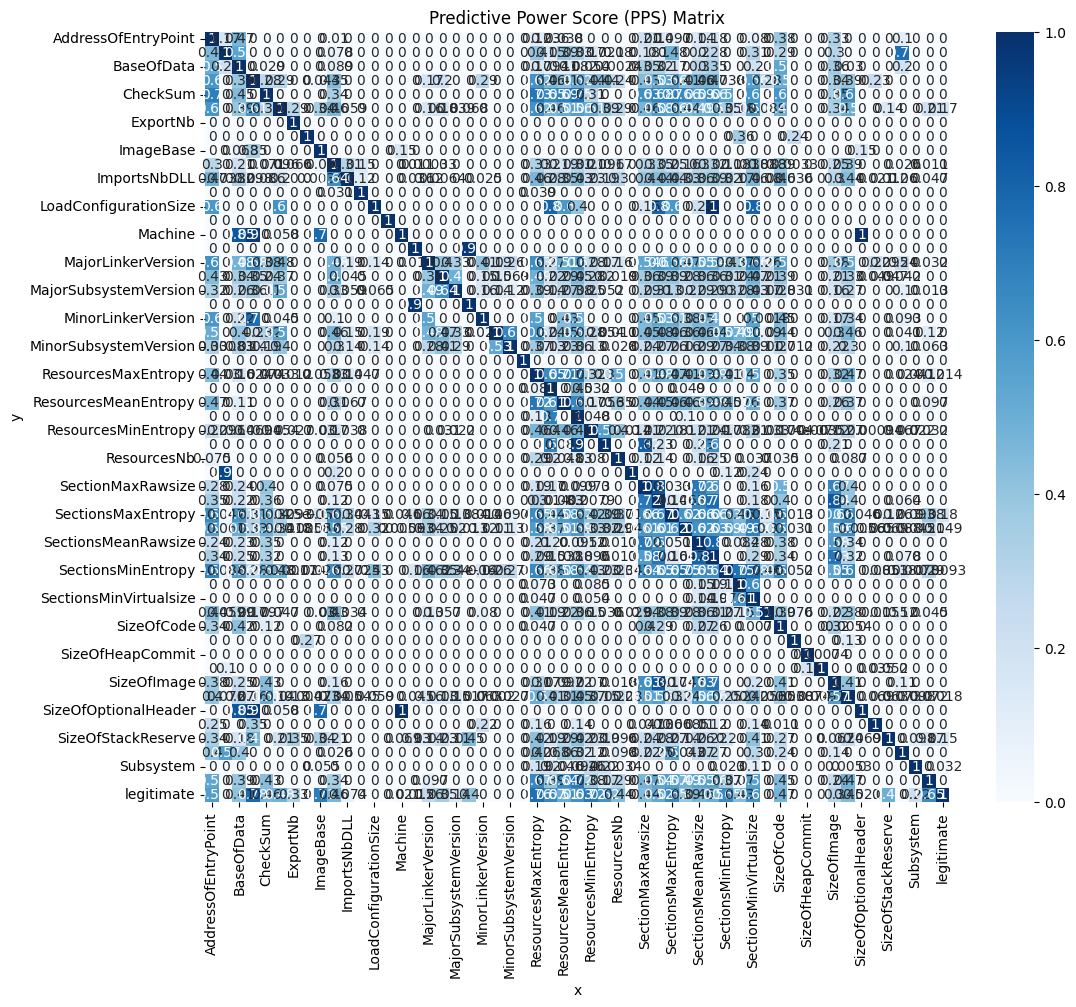

In [30]:
# Υπολογισμός PPS πίνακα
# αριθμητικές στήλες
df_num = dataset.select_dtypes(include=['int64','float64'])

# Μειωμενο δείγμα για γρηγοροτερη εκτέλεση
df_sample = df_num.sample(5000, random_state=42) if len(df_num) > 5000 else df_num

# Υπολογισμός PPS πινακα
pps_matrix = pps.matrix(df_sample)


pps_heatmap = pps_matrix.pivot(columns='x', index='y', values='ppscore')

# Οπτικοποίηση αποτελεσματων
plt.figure(figsize=(12,10))
sns.heatmap(pps_heatmap, annot=True, cmap="Blues", vmin=0, vmax=1)
plt.title("Predictive Power Score (PPS) Matrix")
plt.show()

In [31]:
# επεξεργασία πίνακα PPS για να μεινουν μόνο οι μεταβλητές για "legitimate"
pps_target = pps_matrix[pps_matrix['y'] == 'legitimate']

# Ταξινόμηση απο φθίνουσα τιμη
pps_target_sorted = pps_target.sort_values(by='ppscore', ascending=False)

# Εμφάνιση των πιο ισχυρων χαρακτηριστικών
print("Μεταβλητές με υψηλή προγνωστική ικανότητα για το 'legitimate':")
print(pps_target_sorted[['x', 'ppscore']])

Μεταβλητές με υψηλή προγνωστική ικανότητα για το 'legitimate':
                                x   ppscore
3024                   legitimate  1.000000
164               Characteristics  0.784114
2694          ResourcesMaxEntropy  0.758118
2639          ResourcesMinEntropy  0.720039
659                     ImageBase  0.706275
2859             ResourcesMaxSize  0.667924
1924           SectionsMaxEntropy  0.652556
2969       VersionInformationSize  0.646940
1869           SectionsMinEntropy  0.645285
2749            ResourcesMeanSize  0.625081
2199       SectionsMinVirtualsize  0.623494
2804             ResourcesMinSize  0.623350
494           AddressOfEntryPoint  0.575604
2254        SectionMaxVirtualsize  0.522253
2584         ResourcesMeanEntropy  0.506746
2144      SectionsMeanVirtualsize  0.501928
1429           SizeOfStackReserve  0.494389
1374           DllCharacteristics  0.484128
329                    SizeOfCode  0.474497
1979          SectionsMeanRawsize  0.464683
2364         